<a href="https://colab.research.google.com/github/tronghieu2810/MACHINE-LEARNING/blob/main/UDM_ZTM_ML/TENSORFLOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
plt.style.use('seaborn-whitegrid')

import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.math as tfm
import tensorflow_hub as hub

from sklearn.model_selection import train_test_split

from IPython.display import Image
import os
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# !unzip "drive/My Drive/dog-breed-identification.zip" -d "drive/My Drive/Dog Vision/"


# Constant

In [40]:
NUM_IMAGES  = 1000 #@param {type:'slider', min:1000, max:10000, step:1000}
IMG_SIZE    = 224  #@param 
BATCH_SIZE  = 32   #@param
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # Batch, Height, Width, Channels


# Data

In [5]:
labels_csv = pd.read_csv('/content/drive/MyDrive/Dog Vision/labels.csv')
print(labels_csv.describe(), '\n')
print(labels_csv.head(), '\n')
print(labels_csv['breed'].value_counts(), '\n')
print(labels_csv['breed'].value_counts().median(), '\n')


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126 

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever 

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64 

82.0 



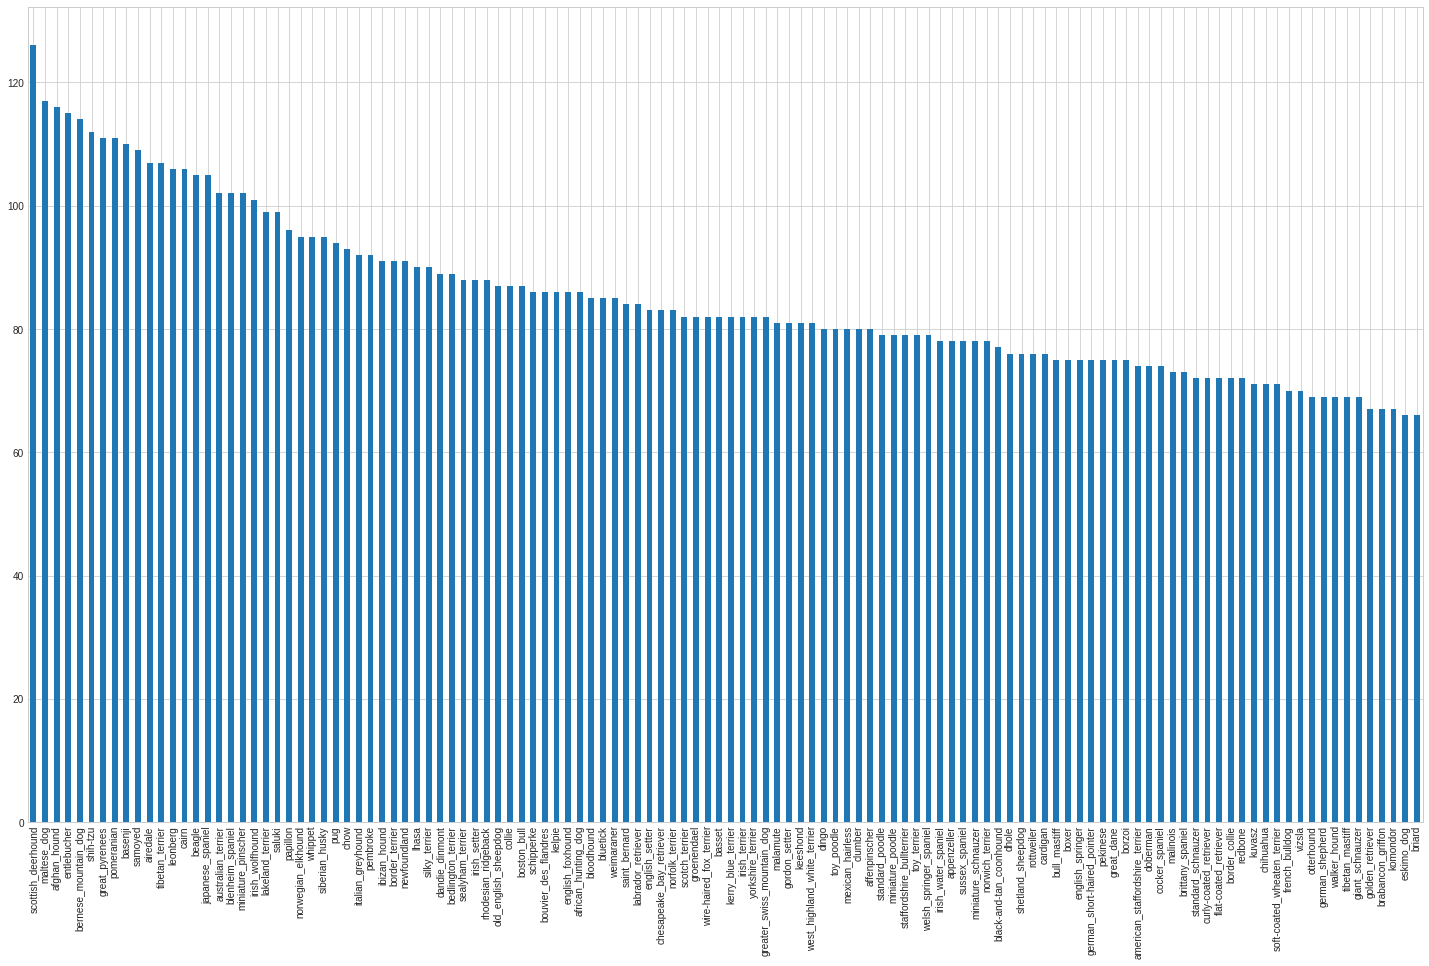

In [6]:
labels_csv['breed'].value_counts().plot.bar(figsize=(25, 15));

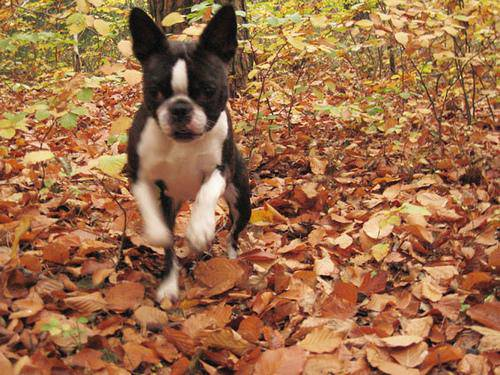

In [7]:
Image('drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [8]:
# Create pathnames from image ID's
filenames = ["drive/MyDrive/Dog Vision/train/" + fname + '.jpg' for fname in labels_csv['id']]

filenames[:5]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [9]:
print(os.listdir('drive/MyDrive/Dog Vision/train/'), '\n')
print(os.listdir('drive/MyDrive/Dog Vision/train/') == len(filenames))

['e4b99d348bb5eec10e433c02173d057e.jpg', 'e297c765ac7e6c1d7c4657c7e72b1544.jpg', 'e139e3a836bd9c57af5355847b8eb805.jpg', 'df2b16112524fe0c873530ac2357368c.jpg', 'e4b586f1a120bba42545d866d45d0602.jpg', 'e49b6c0fb5b8bb8b86fe2a1f48c65746.jpg', 'e2bbe6eedea8520efe8c709d091be39a.jpg', 'e3485777ce8e1a08de482429cd38a420.jpg', 'e3a5ce3bc399b7b6c68a29a9cc5600d4.jpg', 'e866558cded733e2788c68b170752f59.jpg', 'e41d436e4f76b4c13a92abde03ae2721.jpg', 'e54ed50db3e1079db9284bd30494de76.jpg', 'e0e54245b5dc9d5f66cb1012bae1a10c.jpg', 'e3ee6250e25e90f6501f854b27fce20c.jpg', 'df3ba5eee0c008a3284158bb89350673.jpg', 'de1da53a478bd391889a98ee9063c2d7.jpg', 'e2379f60b78b0939a84ebd641ff3bb4a.jpg', 'e552addd2461f8a62e9691fa26b21370.jpg', 'dde1f99c744c9c5f3bd471bd390314d6.jpg', 'e94234a15721850c8aaf3a94d2363f4f.jpg', 'e993788050a70ef538c396f582c3a04c.jpg', 'e073b458a33cbfe9b733764a1246f52e.jpg', 'e33873fb8e4f52734ab6b584dd6ede0e.jpg', 'e81ff379277f5023333efed3beda7f64.jpg', 'e47cac448a3250262bee5660d393da9a.jpg',

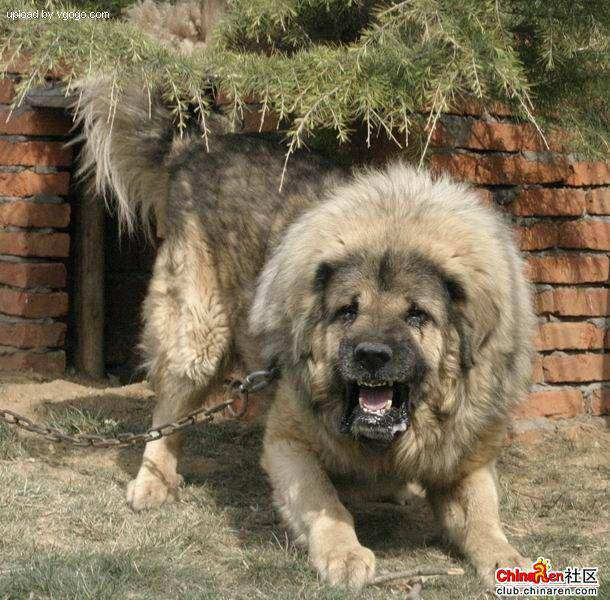

In [10]:
Image(filenames[9000])

In [11]:
labels = labels_csv['breed'].to_numpy()

print(labels)
print(len(labels))

['boston_bull' 'dingo' 'pekinese' ... 'airedale' 'miniature_pinscher'
 'chesapeake_bay_retriever']
10222


In [12]:
# Check number of labels matches the number of filenames
print(len(labels) == len(filenames))

True


In [13]:
unique_breeds = np.unique(labels)

unique_breeds, len(unique_breeds)

(array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier', 'appenzeller',
        'australian_terrier', 'basenji', 'basset', 'beagle',
        'bedlington_terrier', 'bernese_mountain_dog',
        'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
        'bluetick', 'border_collie', 'border_terrier', 'borzoi',
        'boston_bull', 'bouvier_des_flandres', 'boxer',
        'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
        'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
        'chow', 'clumber', 'cocker_spaniel', 'collie',
        'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
        'doberman', 'english_foxhound', 'english_setter',
        'english_springer', 'entlebucher', 'eskimo_dog',
        'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
        'german_short-haired_pointer', 'giant_schnauzer',
        'golden_retriever', 'gordon_setter', 'gre

In [14]:
# Turn a single label into an array of booleans
print(labels[0], '\n')
print(labels[0] == unique_breeds, '\n')

# Turn every labels into a boolean array
boolean_labels = [(label == unique_breeds) for label in labels]
print(boolean_labels[:2], '\n')

boston_bull 

[False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False] 

[array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, 

In [15]:
# Ex: Turning boolean array into integers
print(labels[0], '\n') # Original label
print(np.where(unique_breeds == labels[0]), '\n') # Index where label occurs
print(boolean_labels[0].argmax(), '\n') # Index where label occurs
print(boolean_labels[0].astype(int))

boston_bull 

(array([19]),) 

19 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


# Validation Set

In [16]:
X = filenames
y = boolean_labels

print(len(X), len(y))

10222 10222


In [17]:
X_train, X_val, y_train, y_val = train_test_split(  X[:NUM_IMAGES], 
                                                    y[:NUM_IMAGES],
                                                    test_size=0.2, 
                                                    random_state=42 )

print(len(X_train), len(X_val), len(y_train), len(y_val), '\n')
print(X_train[0], '\n', y_train[0])

800 200 800 200 

drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg 
 [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


# Preprocess Images

In [18]:
image = plt.imread(filenames[42])

print(image.shape, image.max(), image.min(), '\n')

(257, 350, 3) 255 0 



In [19]:
def process_image(image_path, img_size=IMG_SIZE):
    """
    - Function for preprocessing images.
    - Takes an image file path and turns the image into a Tensor.
    """

    # Read in an image file
    image = tf.io.read_file(image_path)
    # Turn the jpeg image into numerical Tensor with 3 colour channels (RGB)
    image = tf.image.decode_jpeg(image, channels=3)
    # Convert the colour channel values from 0-255 to 0-1
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Resize the image to the desired value (224, 224)
    image = tf.image.resize(image, size=[img_size, img_size])

    return image

In [20]:
# Test function
image = tf.io.read_file(filenames[26])
print(image, '\n')
image = tf.image.decode_jpeg(image, channels=3)
print(image, '\n')
image = tf.image.convert_image_dtype(image, tf.float32)
print(image, '\n')

tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\xf4\x01w\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9

# Turning Data Into Batches

In [21]:
def get_image_label_tuple(image_path, label):
    """
    - Takes an image file path name and the associated label,
    processes the image and returns a tuple of (image, label)
    """

    image = process_image(image_path)

    return (image, label)

In [26]:
get_image_label_tuple(X[42], y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [27]:
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Description:
    - Creates batches of data out of image (X) and label (y) pairs.
    - Shuffles the data if it's training data, doesn't shuffle if it's validation data.
    - Accepts test data as input (no labels).

    Params:
    - X: Image filepath
    - y: Labelsq
    """

    if test_data:
        print('Creating test data batches ...')
        data = tf.data.Dataset.from_tensor_slices(tensors=(tf.constant(X)))
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    elif valid_data:
        print('Creating validation data batches ...')
        data = tf.data.Dataset.from_tensor_slices(tensors=(tf.constant(X), tf.constant(y)))    
        data_batch = data.map(get_image_label_tuple).batch(BATCH_SIZE)
        return data_batch
    else:
        print('Creating training data batches ...')
        # Turns filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices(tensors=(tf.constant(X), tf.constant(y)))
        # Shuffles pathnames and labels. Shuffles all the data
        data = data.shuffle(buffer_size=len(X))
        # Create (image, label) tuples (Also turns the image path into a preprocessed image)
        data = data.map(get_image_label_tuple)
        # Turn the training data into batches
        data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [28]:
# Create training & validation data batches
train_data = create_data_batches(X=X_train, y=y_train)
val_data   = create_data_batches(X=X_val,   y=y_val, valid_data=True)

# Checkout the different attributes of our data batches
print(train_data.element_spec)
print(val_data.element_spec)

Creating training data batches ...
Creating validation data batches ...
(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))
(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))


# Visualizing Our Data

In [38]:
def show_images_batch(images, labels, num_imgs_square, figsize, class_names):
    """
    - Displays a plot of `num_imgs_square` images and their labels from a data batch.
    """

    plt.figure(figsize=(figsize, figsize))

    for i in range(num_imgs_square ** 2):
        ax = plt.subplot(num_imgs_square, num_imgs_square, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i].argmax()], fontsize=figsize-2)
        plt.axis('off')

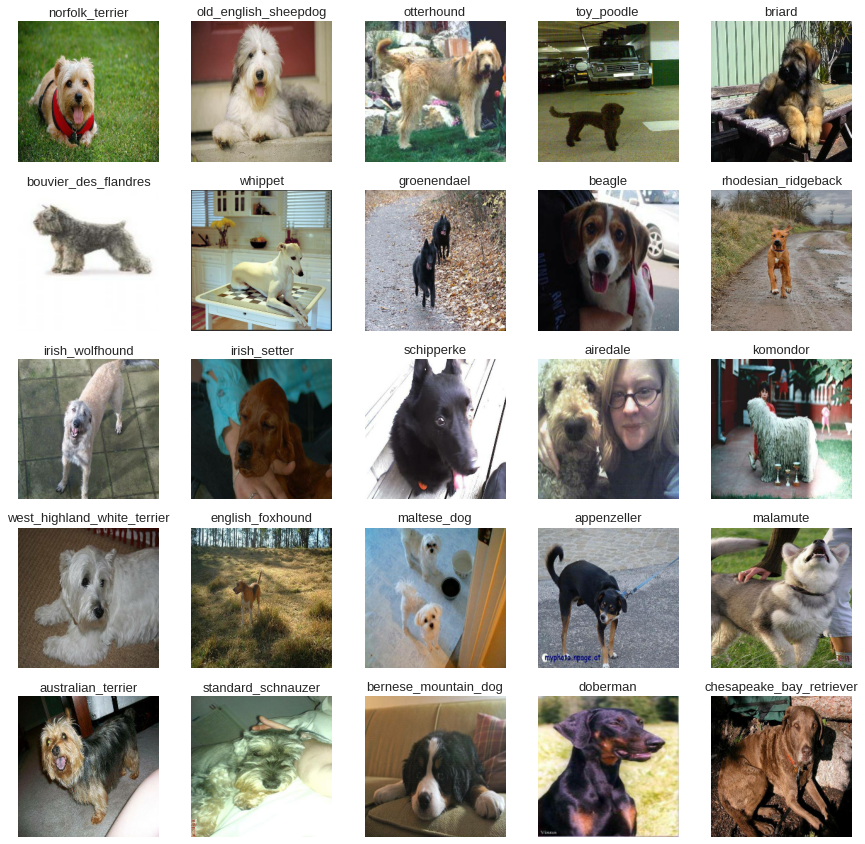

In [39]:
train_images, train_labels = next(train_data.as_numpy_iterator())

show_images_batch(images=train_images, 
                  labels=train_labels, 
                  num_imgs_square=5, 
                  figsize=15, 
                  class_names=unique_breeds)

# Preparing Our Inputs and Outputs

In [44]:
OUTPUT_SHAPE = len(unique_breeds)

# Building A Deep Learning Model

In [41]:
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'

In [46]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print(f'Building model with: {MODEL_URL}')

    # Set up the model layers
    model = tfk.Sequential([
        hub.KerasLayer(MODEL_URL),
        tfk.layers.Dense(units=OUTPUT_SHAPE, activation='softmax')                            
    ])

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(),
                  optimizer=tfk.optimizers.Adam(),
                  metrics=['accuracy'])
    
    # Build the model
    model.build(INPUT_SHAPE)
    model.summary()

    return model

In [47]:
model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


# Evaluating Our Model

In [48]:
%load_ext tensorboard

In [50]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Dog Vision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

# Preventing Overfitting

In [51]:
# Create early stopping callback
early_stopping = tfk.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)